In [9]:
import torch
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
directory_train = 'data\\colon_image_sets\\train'
directory_validation = 'data\\colon_image_sets\\val'
directory_testing = 'data\\colon_image_sets\\test'

In [3]:
data_generator = ImageDataGenerator(rescale=1./255.)
h, w = 299, 299
bs_size = 4

train_data = data_generator.flow_from_directory(
    directory_train,
    target_size=(h, w),
    batch_size=bs_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=True
)

val_data = data_generator.flow_from_directory(
    directory_validation,
    target_size=(h, w),
    batch_size=bs_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

test_data = data_generator.flow_from_directory(
    directory_testing,
    target_size=(h, w),
    batch_size=bs_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
x, y = next(train_data)
x.shape # input shape of one record is (299, 299,3) , 4: is the batch size

(4, 299, 299, 3)

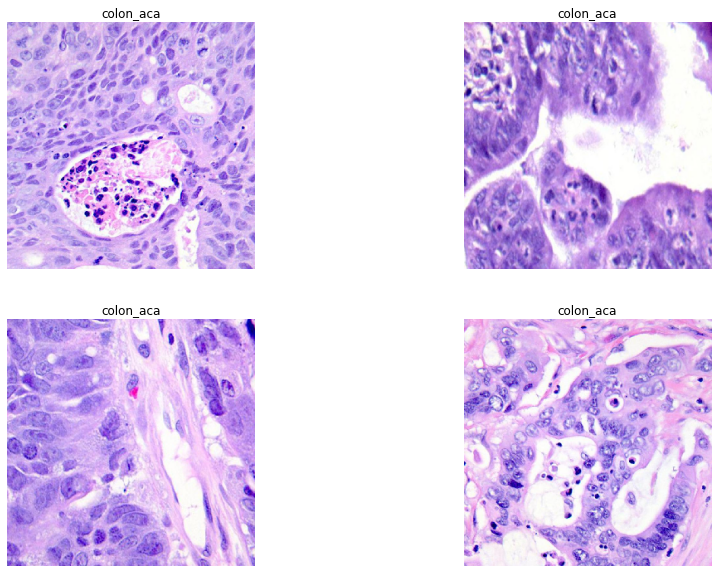

In [5]:
a = train_data.class_indices
class_names = list(a.keys()) # storing class/breed names in a list

def plot_images(img, labels):
    plt.figure(figsize=[15,10])
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')

plot_images(x,y)

In [6]:
def get_model():
    base_model = tf.keras.applications.InceptionResNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(h, w, 3)    
    )

    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.Dense(2, activation="softmax")
    ])

    return model

model = get_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 8, 8, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1573888   
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 55,912,674
Trainable params: 1,575,938
Non-trainable params: 54,336,736
_________________________________________________________________


In [7]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
history = model.fit(train_data, validation_data=val_data, epochs=30)

Epoch 1/30
1500/1500 [==============================] - 183s 114ms/step - loss: 0.0685 - accuracy: 0.9800 - val_loss: 0.0640 - val_accuracy: 0.9750
Epoch 2/30
1500/1500 [==============================] - 168s 112ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0356 - val_accuracy: 0.9885
Epoch 3/30
1500/1500 [==============================] - 176s 117ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0029 - val_accuracy: 0.9985
Epoch 4/30
1500/1500 [==============================] - 177s 118ms/step - loss: 0.0191 - accuracy: 0.9928 - val_loss: 0.0037 - val_accuracy: 0.9980
Epoch 5/30
1500/1500 [==============================] - 183s 122ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 6/30
1500/1500 [==============================] - 181s 121ms/step - loss: 0.0099 - accuracy: 0.9958 - val_loss: 0.0536 - val_accuracy: 0.9840
Epoch 7/30
1500/1500 [==============================] - 185s 123ms/step - loss: 0.0087 - accuracy: 0.9972 - val_

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy: 0.9990000128746033 \nValidation Accuracy: 0.9984999895095825')

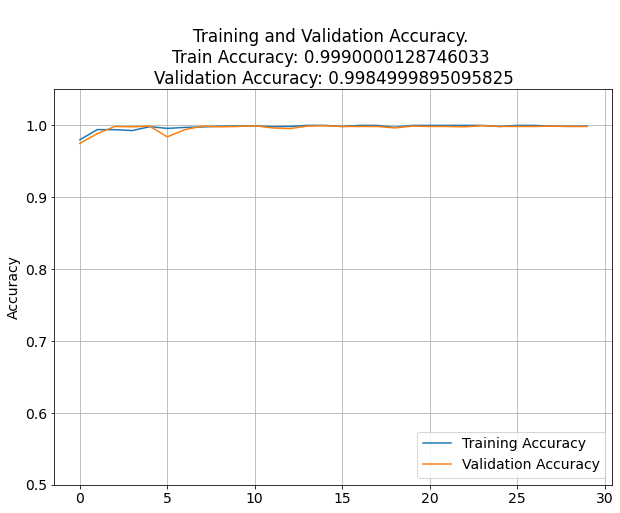

In [11]:
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0.5,1.05])
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {(str(acc[-1]))} \nValidation Accuracy: {str(val_acc[-1])}')

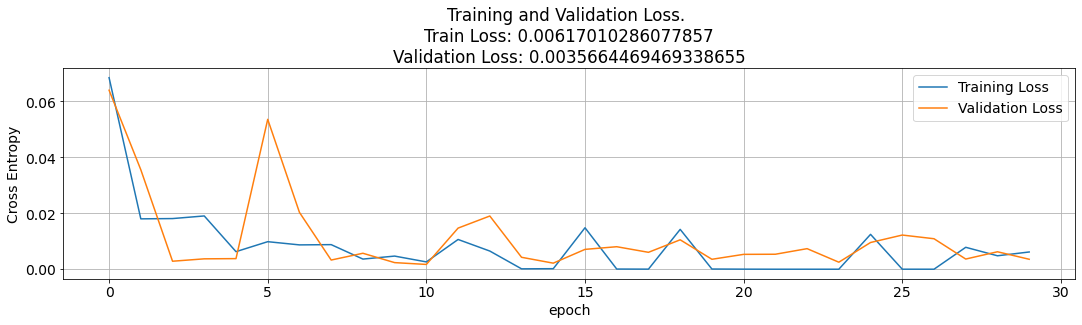

In [12]:
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

In [13]:
accuracy_score = model.evaluate(test_data)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])

500/500 [==============================] - 41s 81ms/step - loss: 0.0018 - accuracy: 0.9995
[0.0018133153207600117, 0.9994999766349792]
Accuracy: 99.9500%
Loss:  0.0018133153207600117


500/500 [==============================] - 41s 83ms/step


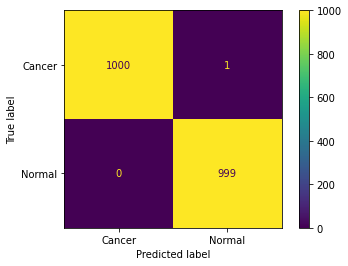

In [ ]:
labels = ["Cancer", "Normal"]

preds = model.predict(test_data, verbose=1)
preds_labels = np.argmax(preds, axis=1)
gr_th = test_data.classes

cm = confusion_matrix(preds_labels, gr_th)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [14]:
model.save_weights("final_30_epoch.h5")

In [7]:
model = get_model()
model.load_weights("final_30_epoch.h5")
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [8]:
accuracy_score = model.evaluate(test_data)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])

500/500 [==============================] - 49s 83ms/step - loss: 0.0018 - categorical_accuracy: 0.9995
[0.0018133152043446898, 0.9994999766349792]
Accuracy: 99.9500%
Loss:  0.0018133152043446898


500/500 [==============================] - 41s 83ms/step


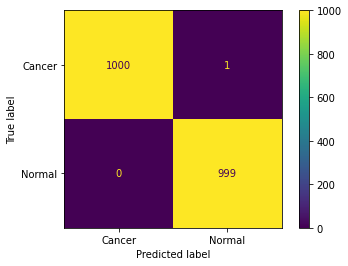

In [18]:
labels = ["Cancer", "Normal"]

preds = model.predict(test_data, verbose=1)
preds_labels = np.argmax(preds, axis=1)
gr_th = test_data.classes

cm = confusion_matrix(preds_labels, gr_th)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()